## Ch 3 인공신경망 (Artificial Neural Network)

### 데이터 전처리 (preprocessing)

Standardization (표준화) : 표준 정규 분포 등 표준 함수로 변환  
Normalization (정규화) : 0 ~ 1 의 값으로 정규화

In [4]:
import numpy as np

x_train = [1,2,3,4,5,6,7,8]
x_test = [1.2,1.5,3.5,4.5,6.5,7.8]


def normalization(d_train, d_test=None):   # 데이터 정규화 함수
    min_vars = np.min(d_train, axis=0)
    max_vars = np.max(d_train, axis=0)
    if d_test is None:
        return (d_train - min_vars) / (max_vars - min_vars)
    else:
        return (d_train - min_vars) / (max_vars - min_vars), (d_test - min_vars) / (max_vars - min_vars)

def standardization(d_train, d_test=None): # 데이터 표준화 함수
    mean_vars = np.mean(d_train, axis=0)
    std_vars = np.std(d_train, axis=0)
    if d_test is None:
        return (d_train - mean_vars) / std_vars
    else:
        return (d_train - mean_vars) / std_vars, (d_test - mean_vars) / std_vars

# 데이터 정규화 및 표준화 적용
x_train_nrm, x_test_nrm = normalization(x_train, x_test)
x_train_std, x_test_std = standardization(x_train, x_test)
print('max(x_nrm): %.4f \tmin(x_nrm): %.4f'%(np.max(x_train_nrm), np.min(x_train_nrm)))
print('mean(x_std): %.4f\tstd (x_std): %.4f'% (np.mean(x_train_std), np.std (x_train_std)))


max(x_nrm): 1.0000 	min(x_nrm): 0.0000
mean(x_std): 0.0000	std (x_std): 1.0000


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_train = np.reshape(x_train,(-1,1))

minmax = MinMaxScaler()
x_train_nrm = minmax.fit_transform(x_train)

std = StandardScaler()
x_train_std = std.fit_transform(x_train)

print('max(x_nrm): %.4f \tmin(x_nrm): %.4f'%(np.max(x_train_nrm), np.min(x_train_nrm)))
print('mean(x_std): %.4f\tstd (x_std): %.4f'% (np.mean(x_train_std), np.std (x_train_std)))


max(x_nrm): 1.0000 	min(x_nrm): 0.0000
mean(x_std): 0.0000	std (x_std): 1.0000


## 인공신경망 - Multilayer Perceptron
### XOR logic gate 학습
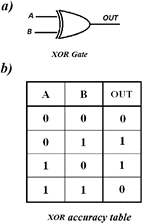
#### 1. 로지스틱 회귀분서

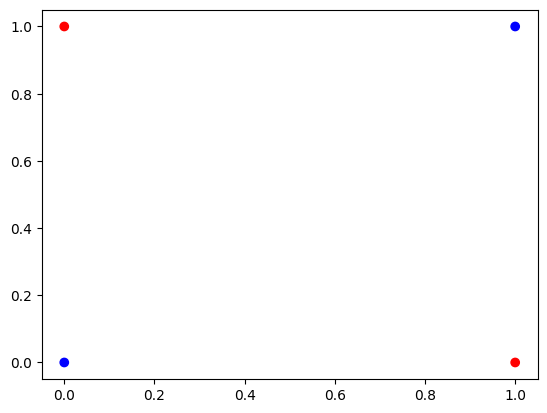

Iter:   100, Loss: 0.7569
Iter:   200, Loss: 0.7471
Iter:   300, Loss: 0.7389
Iter:   400, Loss: 0.7320
Iter:   500, Loss: 0.7261
Iter:   600, Loss: 0.7211
Iter:   700, Loss: 0.7169
Iter:   800, Loss: 0.7133
Iter:   900, Loss: 0.7103
Iter:  1000, Loss: 0.7077
Iter:  1100, Loss: 0.7055
Iter:  1200, Loss: 0.7037
Iter:  1300, Loss: 0.7021
Iter:  1400, Loss: 0.7007
Iter:  1500, Loss: 0.6996
Iter:  1600, Loss: 0.6986
Iter:  1700, Loss: 0.6978
Iter:  1800, Loss: 0.6971
Iter:  1900, Loss: 0.6965
Iter:  2000, Loss: 0.6960
Accuracy: 0.5000


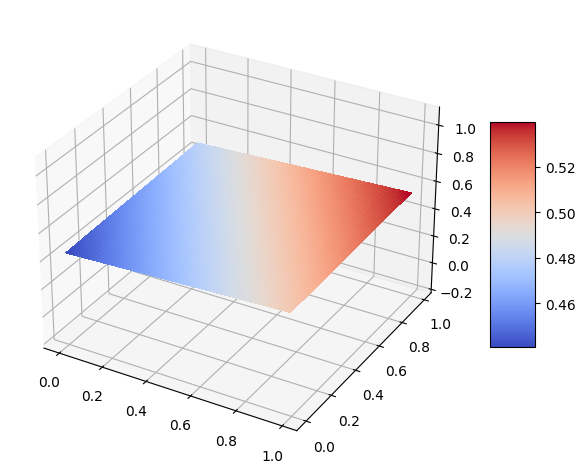

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 랜덤 시드 설정
tf.random.set_seed(0)

# 데이터 생성
xdata = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32)
ydata = tf.constant([[0], [1], [1], [0]], dtype=tf.float32)

# 데이터 시각화
plt.scatter(xdata[:, 0], xdata[:, 1], color=['blue', 'red', 'red', 'blue'])
plt.show()

# 데이터셋 정의
dataset = tf.data.Dataset.from_tensor_slices((xdata, ydata)).batch(len(xdata))

# 손실 함수 정의
def loss_fn(y_true, y_pred):
    cost = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return cost

# 정확도 함수 정의
def accuracy_fn(y_true, y_pred):
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_true), dtype=tf.float32))
    return accuracy
    

# 모델 정의
def model(x):
    hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(x, W) + b))  # 로지스틱 회귀
    return hypothesis

# 훈련 매개변수 및 변수 초기화
EPOCHS = 2000
W = tf.Variable(tf.random.normal([2, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
acc = accuracy_fn(ydata, model(xdata))
print("Accuracy: {:.4f}".format(acc))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


#### 인공신경망 - Multilayer perceptron (MLP) 학습

In [16]:
# 가중치와 편향 초기화
W1 = tf.Variable(tf.random.normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random.normal([2]), name='bias1')
W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

# 훈련 가능한 변수 목록
trainable_vars = [W1, b1, W2, b2]

# 모델 정의
def model(x):
    l1 = tf.sigmoid(tf.matmul(x, W1) + b1)
    hypothesis = tf.sigmoid(tf.matmul(l1, W2) + b2)  # 수정: l1을 사용
    return hypothesis


# Binary Classification 문제 이기 때문에 Logistic Regression에서 사용했던 Loss, Accuracy 함수 그대로 사용

# 이전 세션 클리어
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.summary()
# 훈련 설정
EPOCHS = 2000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Iter:   100, Loss: 0.6936
Iter:   200, Loss: 0.6911
Iter:   300, Loss: 0.6850
Iter:   400, Loss: 0.6663
Iter:   500, Loss: 0.6261
Iter:   600, Loss: 0.5770
Iter:   700, Loss: 0.5421
Iter:   800, Loss: 0.5210
Iter:   900, Loss: 0.5068
Iter:  1000, Loss: 0.4932
Iter:  1100, Loss: 0.4620
Iter:  1200, Loss: 0.3666
Iter:  1300, Loss: 0.2210
Iter:  1400, Loss: 0.1287
Iter:  1500, Loss: 0.0847
Iter:  1600, Loss: 0.0618
Iter:  1700, Loss: 0.0482
Iter:  1800, Los

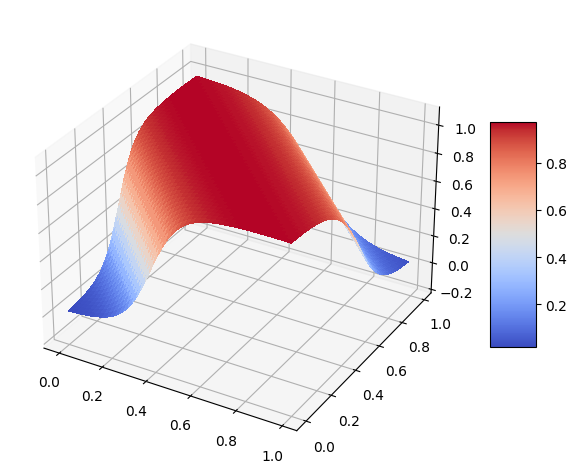

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


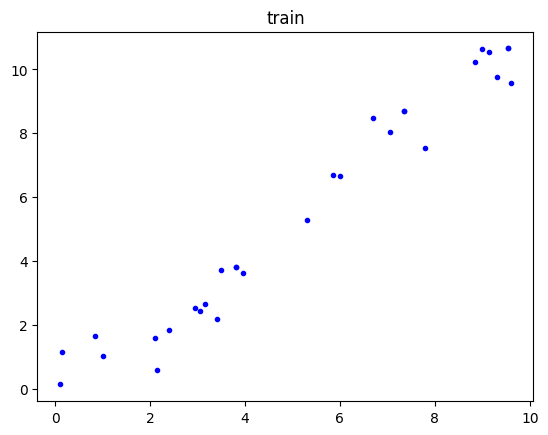

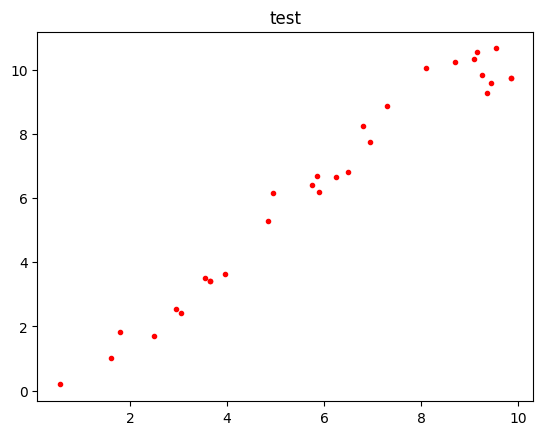

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 랜덤 시드 설정
tf.random.set_seed(1)

# 데이터 불러오기
traindata = np.loadtxt('wine_traindata.csv', delimiter=',', dtype=np.float32)
testdata = np.loadtxt('wine_testdata.csv', delimiter=',', dtype=np.float32)

# 훈련 및 테스트 데이터 분할
x_train = traindata[:, [0]]
y_train = traindata[:, [-1]]
x_test = testdata[:, [0]]
y_test = testdata[:, [-1]]

# 훈련 데이터 시각화
plt.plot(x_train, y_train, 'b.')
plt.title('train')
plt.show()

# 테스트 데이터 시각화
plt.plot(x_test, y_test, 'r.')
plt.title('test')
plt.show()



In [21]:

# 모델 정의
tf.keras.backend.clear_session()
normal_init = tf.keras.initializers.RandomNormal(stddev=1)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=300,
                                    activation='sigmoid',
                                    input_shape=(x_train.shape[1],),
                                    kernel_initializer=normal_init),
                        tf.keras.layers.Dense(units=300,
                                    activation='sigmoid',
                                    kernel_initializer=normal_init),
                        tf.keras.layers.Dense(units=300,
                                    activation='sigmoid',
                                    kernel_initializer=normal_init),
                        tf.keras.layers.Dense(units=1,
                                    kernel_initializer=normal_init)])    
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               600       
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 181,501
Trainable params: 181,501
Non-trainable params: 0
_________________________________________________________________


In [22]:
dataset = tf.data.Dataset.from_tensor_slices ((x_train, y_train)). batch (len (x_train))

# 손실 함수 정의
def loss_fn(hypothesis, labels):
    return tf.reduce_mean(tf.keras.losses.MSE(labels, hypothesis)) + \
           0.1 * (tf.nn.l2_loss(model.trainable_variables[0]) + \
                  tf.nn.l2_loss(model.trainable_variables[2]) + \
                  tf.nn.l2_loss(model.trainable_variables[4]) + \
                  tf.nn.l2_loss(model.trainable_variables[6]))


def loss_wo_reg_fn(hypothesis, labels):
    return tf.reduce_mean(tf.keras.losses.MSE(labels, hypothesis))


Iter:   500, Loss_train: 0.2001, Loss_test: 0.4708
Iter:  1000, Loss_train: 0.1337, Loss_test: 0.5616
Iter:  1500, Loss_train: 0.1135, Loss_test: 0.6289
Iter:  2000, Loss_train: 0.1020, Loss_test: 0.5946
Iter:  2500, Loss_train: 0.0967, Loss_test: 0.5425
Iter:  3000, Loss_train: 0.0866, Loss_test: 0.4946
Iter:  3500, Loss_train: 0.1300, Loss_test: 0.5627
Iter:  4000, Loss_train: 0.1075, Loss_test: 0.6991
Iter:  4500, Loss_train: 0.1009, Loss_test: 0.7022
Iter:  5000, Loss_train: 0.0839, Loss_test: 0.7192


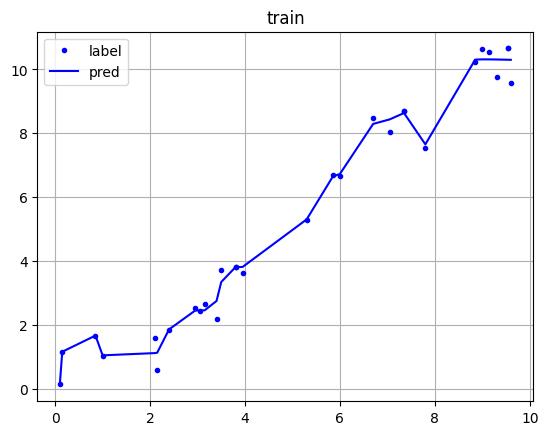

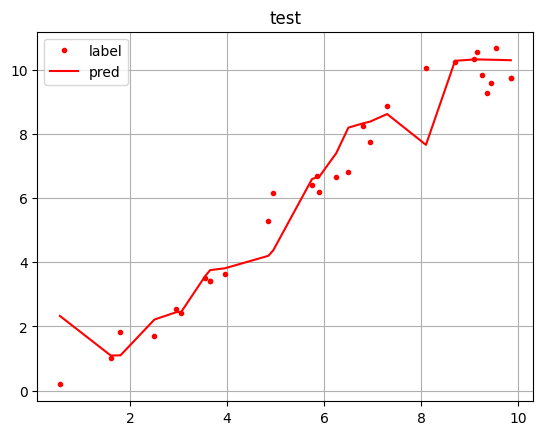

In [23]:
# 훈련 매개변수 설정
EPOCHS = 5000
optimizer = tf.keras.optimizers.Adam(0.02)

# 훈련 루프
fstr = "Iter: {:5}, Loss_train: {:1.4f}, Loss_test: {:1.4f}"
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_wo_reg_fn(pred, labels)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 500 == 0:
        print(fstr.format(step + 1, loss_wo_reg_fn(model(x_train), y_train), loss_wo_reg_fn(model(x_test), y_test)))

# 결과 시각화
plt.figure()
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, model(x_train), 'b-')
plt.title('train')
plt.legend(['label', 'pred'])
plt.grid()

plt.figure()
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, model(x_test), 'r-')
plt.title('test')
plt.legend(['label', 'pred'])
plt.grid()
plt.show()


Iter:   500, Loss_train: 0.0703, Loss_test: 0.5601
Iter:  1000, Loss_train: 0.0689, Loss_test: 0.6421
Iter:  1500, Loss_train: 0.0893, Loss_test: 0.5140
Iter:  2000, Loss_train: 0.1005, Loss_test: 0.5504
Iter:  2500, Loss_train: 0.1464, Loss_test: 0.3282
Iter:  3000, Loss_train: 0.1317, Loss_test: 0.3544
Iter:  3500, Loss_train: 0.1354, Loss_test: 0.3471
Iter:  4000, Loss_train: 0.1337, Loss_test: 0.3517
Iter:  4500, Loss_train: 0.1155, Loss_test: 0.3625
Iter:  5000, Loss_train: 0.1031, Loss_test: 0.4086


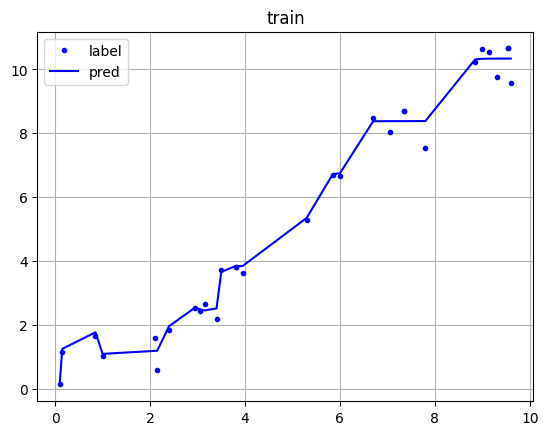

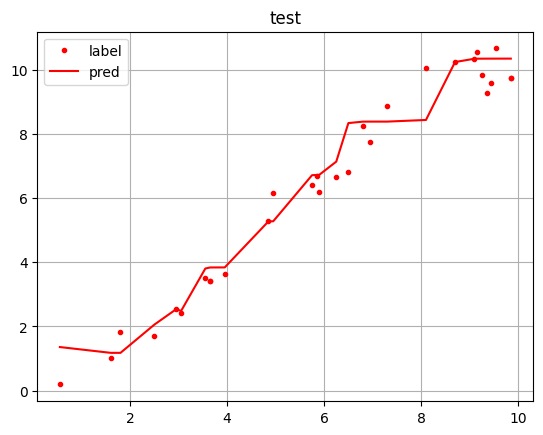

In [24]:
# 훈련 매개변수 설정
EPOCHS = 5000
optimizer = tf.keras.optimizers.Adam(0.02)

# 훈련 루프
fstr = "Iter: {:5}, Loss_train: {:1.4f}, Loss_test: {:1.4f}"
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_wo_reg_fn(pred, labels)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 500 == 0:
        print(fstr.format(step + 1, loss_wo_reg_fn(model(x_train), y_train), loss_wo_reg_fn(model(x_test), y_test)))

# 결과 시각화
plt.figure()
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, model(x_train), 'b-')
plt.title('train')
plt.legend(['label', 'pred'])
plt.grid()

plt.figure()
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, model(x_test), 'r-')
plt.title('test')
plt.legend(['label', 'pred'])
plt.grid()
plt.show()


In [25]:
from tensorflow.keras.regularizers import l2
# 모델 정의
normal_init = tf.keras.initializers.RandomNormal(stddev=1)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=300,activation='sigmoid', input_shape=(x_train.shape[1],), 	kernel_initializer=normal_init, kernel_regularizer=l2(0.1)), 
	tf.keras.layers.Dense(units=300, activation='sigmoid', kernel_initializer=normal_init, kernel_regularizer=l2(0.1)), 
	tf.keras.layers.Dense(units=300, activation='sigmoid', kernel_initializer=normal_init, kernel_regularizer=l2(0.1)), 
	tf.keras.layers.Dense(units=1, kernel_initializer=normal_init, kernel_regularizer=l2(0.1))])    
model.summary()

EPOCHS = 2000
optimizer = tf.keras.optimizers.Adam(0.02)

#학습
model.compile(loss = 'mse', optimizer = optimizer, metrics=['mse'])
model.fit(dataset,epochs= EPOCHS)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               600       
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 300)               90300     
                                                                 
 dense_7 (Dense)             (None, 1)                 301       
                                                                 
Total params: 181,501
Trainable params: 181,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
1/1 [==============================] - 1s 627ms/step - loss: 18397.6055 - mse: 210.2334
Epoch 2/5000
1/1 [==============================] - 0s 8ms/step - loss: 18333.6

1/1 [==============================] - 0s 0s/step - loss: 502.6786 - mse: 0.6178
Epoch 160/5000
1/1 [==============================] - 0s 16ms/step - loss: 494.2771 - mse: 0.7723
Epoch 161/5000
1/1 [==============================] - 0s 0s/step - loss: 486.5003 - mse: 1.3777
Epoch 162/5000
1/1 [==============================] - 0s 0s/step - loss: 477.5573 - mse: 0.6446
Epoch 163/5000
1/1 [==============================] - 0s 16ms/step - loss: 469.6316 - mse: 0.7608
Epoch 164/5000
1/1 [==============================] - 0s 0s/step - loss: 462.1668 - mse: 1.1877
Epoch 165/5000
1/1 [==============================] - 0s 0s/step - loss: 453.6617 - mse: 0.4243
Epoch 166/5000
1/1 [==============================] - 0s 16ms/step - loss: 446.7220 - mse: 1.0557
Epoch 167/5000
1/1 [==============================] - 0s 0s/step - loss: 438.8775 - mse: 0.6213
Epoch 168/5000
1/1 [==============================] - 0s 7ms/step - loss: 431.9054 - mse: 0.9026
Epoch 169/5000
1/1 [============================

1/1 [==============================] - 0s 3ms/step - loss: 76.5078 - mse: 10.3807
Epoch 329/5000
1/1 [==============================] - 0s 0s/step - loss: 72.0037 - mse: 4.1623
Epoch 330/5000
1/1 [==============================] - 0s 0s/step - loss: 80.2032 - mse: 11.0550
Epoch 331/5000
1/1 [==============================] - 0s 16ms/step - loss: 83.9211 - mse: 13.9084
Epoch 332/5000
1/1 [==============================] - 0s 0s/step - loss: 78.5434 - mse: 8.0621
Epoch 333/5000
1/1 [==============================] - 0s 0s/step - loss: 74.1299 - mse: 3.4886
Epoch 334/5000
1/1 [==============================] - 0s 0s/step - loss: 75.3160 - mse: 4.7628
Epoch 335/5000
1/1 [==============================] - 0s 16ms/step - loss: 77.7095 - mse: 7.4698
Epoch 336/5000
1/1 [==============================] - 0s 0s/step - loss: 76.5659 - mse: 6.8503
Epoch 337/5000
1/1 [==============================] - 0s 0s/step - loss: 72.5931 - mse: 3.5721
Epoch 338/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 14.7227 - mse: 0.4805
Epoch 499/5000
1/1 [==============================] - 0s 16ms/step - loss: 14.4820 - mse: 0.3604
Epoch 500/5000
1/1 [==============================] - 0s 0s/step - loss: 14.4509 - mse: 0.4459
Epoch 501/5000
1/1 [==============================] - 0s 16ms/step - loss: 14.4756 - mse: 0.5850
Epoch 502/5000
1/1 [==============================] - 0s 0s/step - loss: 14.4312 - mse: 0.6511
Epoch 503/5000
1/1 [==============================] - 0s 0s/step - loss: 14.3584 - mse: 0.6885
Epoch 504/5000
1/1 [==============================] - 0s 16ms/step - loss: 14.3514 - mse: 0.7882
Epoch 505/5000
1/1 [==============================] - 0s 0s/step - loss: 14.5862 - mse: 1.1296
Epoch 506/5000
1/1 [==============================] - 0s 0s/step - loss: 15.5081 - mse: 2.1530
Epoch 507/5000
1/1 [==============================] - 0s 16ms/step - loss: 18.5301 - mse: 5.2708
Epoch 508/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 7.1809 - mse: 0.6008
Epoch 670/5000
1/1 [==============================] - 0s 16ms/step - loss: 7.3306 - mse: 0.7766
Epoch 671/5000
1/1 [==============================] - 0s 0s/step - loss: 7.6379 - mse: 1.1069
Epoch 672/5000
1/1 [==============================] - 0s 0s/step - loss: 8.2996 - mse: 1.7932
Epoch 673/5000
1/1 [==============================] - 0s 16ms/step - loss: 9.5124 - mse: 3.0225
Epoch 674/5000
1/1 [==============================] - 0s 0s/step - loss: 11.1250 - mse: 4.6527
Epoch 675/5000
1/1 [==============================] - 0s 7ms/step - loss: 11.0112 - mse: 4.5263
Epoch 676/5000
1/1 [==============================] - 0s 0s/step - loss: 7.9245 - mse: 1.4157
Epoch 677/5000
1/1 [==============================] - 0s 0s/step - loss: 7.3972 - mse: 0.8344
Epoch 678/5000
1/1 [==============================] - 0s 16ms/step - loss: 8.6657 - mse: 2.0335
Epoch 679/5000
1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 0s/step - loss: 5.0915 - mse: 0.4100
Epoch 842/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.0868 - mse: 0.4097
Epoch 843/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0818 - mse: 0.4115
Epoch 844/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0770 - mse: 0.4110
Epoch 845/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.0722 - mse: 0.4131
Epoch 846/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0673 - mse: 0.4124
Epoch 847/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0623 - mse: 0.4143
Epoch 848/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.0569 - mse: 0.4128
Epoch 849/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.0518 - mse: 0.4145
Epoch 850/5000
1/1 [==============================] - 0s 7ms/step - loss: 5.0463 - mse: 0.4128
Epoch 851/5000
1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 0s/step - loss: 4.4908 - mse: 0.4180
Epoch 1014/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4886 - mse: 0.4179
Epoch 1015/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.4867 - mse: 0.4182
Epoch 1016/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4846 - mse: 0.4182
Epoch 1017/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.4826 - mse: 0.4183
Epoch 1018/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.4807 - mse: 0.4185
Epoch 1019/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4786 - mse: 0.4185
Epoch 1020/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4767 - mse: 0.4186
Epoch 1021/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.4747 - mse: 0.4188
Epoch 1022/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.4730 - mse: 0.4190
Epoch 1023/5000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 0s/step - loss: 4.2851 - mse: 0.4489
Epoch 1184/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2866 - mse: 0.4578
Epoch 1185/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2875 - mse: 0.4532
Epoch 1186/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2883 - mse: 0.4621
Epoch 1187/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2888 - mse: 0.4568
Epoch 1188/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2889 - mse: 0.4656
Epoch 1189/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2888 - mse: 0.4593
Epoch 1190/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2886 - mse: 0.4677
Epoch 1191/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2881 - mse: 0.4608
Epoch 1192/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2877 - mse: 0.4689
Epoch 1193/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.1822 - mse: 0.4484
Epoch 1354/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1881 - mse: 0.4515
Epoch 1355/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1885 - mse: 0.4591
Epoch 1356/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1836 - mse: 0.4498
Epoch 1357/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1771 - mse: 0.4475
Epoch 1358/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1735 - mse: 0.4421
Epoch 1359/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1740 - mse: 0.4415
Epoch 1360/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1769 - mse: 0.4464
Epoch 1361/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1789 - mse: 0.4438
Epoch 1362/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1785 - mse: 0.4474
Epoch 1363/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 4.2924 - mse: 0.5556
Epoch 1524/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3784 - mse: 0.6595
Epoch 1525/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2474 - mse: 0.5066
Epoch 1526/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1778 - mse: 0.4382
Epoch 1527/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2745 - mse: 0.5417
Epoch 1528/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3041 - mse: 0.5504
Epoch 1529/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2037 - mse: 0.4666
Epoch 1530/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1612 - mse: 0.4229
Epoch 1531/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2245 - mse: 0.4823
Epoch 1532/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.2546 - mse: 0.5353
Epoch 1533/5000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 0s/step - loss: 4.1552 - mse: 0.4829
Epoch 1694/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2250 - mse: 0.5356
Epoch 1695/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2517 - mse: 0.5804
Epoch 1696/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2201 - mse: 0.5274
Epoch 1697/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1582 - mse: 0.4811
Epoch 1698/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1159 - mse: 0.4311
Epoch 1699/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1137 - mse: 0.4310
Epoch 1700/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1418 - mse: 0.4691
Epoch 1701/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1754 - mse: 0.4928
Epoch 1702/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1918 - mse: 0.5289
Epoch 1703/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 4.1160 - mse: 0.4468
Epoch 1864/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1590 - mse: 0.5025
Epoch 1865/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1989 - mse: 0.5267
Epoch 1866/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2154 - mse: 0.5659
Epoch 1867/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2127 - mse: 0.5454
Epoch 1868/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1886 - mse: 0.5443
Epoch 1869/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1588 - mse: 0.5000
Epoch 1870/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1272 - mse: 0.4846
Epoch 1871/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1034 - mse: 0.4523
Epoch 1872/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0890 - mse: 0.4445
Epoch 1873/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 4.0794 - mse: 0.4329
Epoch 2034/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0842 - mse: 0.4442
Epoch 2035/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0900 - mse: 0.4446
Epoch 2036/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0962 - mse: 0.4612
Epoch 2037/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1046 - mse: 0.4619
Epoch 2038/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1152 - mse: 0.4859
Epoch 2039/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1316 - mse: 0.4905
Epoch 2040/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1548 - mse: 0.5302
Epoch 2041/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1933 - mse: 0.5504
Epoch 2042/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2480 - mse: 0.6270
Epoch 2043/5000
1/1 [==============================] - 0s 16m

1/1 [==============================] - 0s 16ms/step - loss: 4.0607 - mse: 0.4290
Epoch 2204/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0658 - mse: 0.4372
Epoch 2205/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0790 - mse: 0.4451
Epoch 2206/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0976 - mse: 0.4738
Epoch 2207/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1247 - mse: 0.4889
Epoch 2208/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1636 - mse: 0.5444
Epoch 2209/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2322 - mse: 0.5933
Epoch 2210/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3435 - mse: 0.7308
Epoch 2211/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5601 - mse: 0.9133
Epoch 2212/5000
1/1 [==============================] - 0s 0s/step - loss: 4.8852 - mse: 1.2813
Epoch 2213/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 7ms/step - loss: 4.5510 - mse: 0.9032
Epoch 2374/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4634 - mse: 0.8487
Epoch 2375/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3116 - mse: 0.6635
Epoch 2376/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1369 - mse: 0.5077
Epoch 2377/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0670 - mse: 0.4288
Epoch 2378/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1253 - mse: 0.4795
Epoch 2379/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2165 - mse: 0.5880
Epoch 2380/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2403 - mse: 0.5895
Epoch 2381/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1723 - mse: 0.5428
Epoch 2382/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0918 - mse: 0.4495
Epoch 2383/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.3895 - mse: 0.7458
Epoch 2544/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1814 - mse: 0.5108
Epoch 2545/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0914 - mse: 0.4261
Epoch 2546/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2339 - mse: 0.5817
Epoch 2547/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3033 - mse: 0.6288
Epoch 2548/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1719 - mse: 0.5222
Epoch 2549/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0710 - mse: 0.4170
Epoch 2550/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1237 - mse: 0.4696
Epoch 2551/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2205 - mse: 0.5883
Epoch 2552/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2389 - mse: 0.5920
Epoch 2553/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.3327 - mse: 0.7024
Epoch 2714/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3049 - mse: 0.6987
Epoch 2715/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2597 - mse: 0.6302
Epoch 2716/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1812 - mse: 0.5717
Epoch 2717/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1062 - mse: 0.4821
Epoch 2718/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0551 - mse: 0.4400
Epoch 2719/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0454 - mse: 0.4292
Epoch 2720/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0700 - mse: 0.4493
Epoch 2721/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1091 - mse: 0.4987
Epoch 2722/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1478 - mse: 0.5237
Epoch 2723/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 16ms/step - loss: 4.2589 - mse: 0.6538
Epoch 2884/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3417 - mse: 0.7133
Epoch 2885/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4297 - mse: 0.8282
Epoch 2886/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5509 - mse: 0.9196
Epoch 2887/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6083 - mse: 1.0113
Epoch 2888/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6110 - mse: 0.9783
Epoch 2889/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4330 - mse: 0.8318
Epoch 2890/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2025 - mse: 0.5744
Epoch 2891/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0593 - mse: 0.4403
Epoch 2892/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1111 - mse: 0.4938
Epoch 2893/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 16ms/step - loss: 4.0699 - mse: 0.4444
Epoch 3054/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1472 - mse: 0.5138
Epoch 3055/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1939 - mse: 0.5804
Epoch 3056/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1835 - mse: 0.5579
Epoch 3057/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1265 - mse: 0.5206
Epoch 3058/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0706 - mse: 0.4583
Epoch 3059/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0381 - mse: 0.4343
Epoch 3060/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0352 - mse: 0.4330
Epoch 3061/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0560 - mse: 0.4500
Epoch 3062/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0917 - mse: 0.4937
Epoch 3063/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 4.2622 - mse: 0.6414
Epoch 3224/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2531 - mse: 0.6519
Epoch 3225/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2364 - mse: 0.6164
Epoch 3226/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1905 - mse: 0.5905
Epoch 3227/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1375 - mse: 0.5243
Epoch 3228/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0810 - mse: 0.4823
Epoch 3229/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0420 - mse: 0.4381
Epoch 3230/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0288 - mse: 0.4287
Epoch 3231/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0391 - mse: 0.4417
Epoch 3232/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0634 - mse: 0.4593
Epoch 3233/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.0598 - mse: 0.4334
Epoch 3394/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1330 - mse: 0.5121
Epoch 3395/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2074 - mse: 0.6086
Epoch 3396/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2214 - mse: 0.6107
Epoch 3397/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1604 - mse: 0.5640
Epoch 3398/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0871 - mse: 0.4756
Epoch 3399/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0458 - mse: 0.4327
Epoch 3400/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0535 - mse: 0.4349
Epoch 3401/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0924 - mse: 0.4615
Epoch 3402/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1307 - mse: 0.5083
Epoch 3403/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.2348 - mse: 0.5905
Epoch 3564/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3077 - mse: 0.6440
Epoch 3565/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2048 - mse: 0.5606
Epoch 3566/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0780 - mse: 0.4309
Epoch 3567/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0503 - mse: 0.4159
Epoch 3568/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1225 - mse: 0.5062
Epoch 3569/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2071 - mse: 0.5884
Epoch 3570/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2221 - mse: 0.6271
Epoch 3571/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1764 - mse: 0.5704
Epoch 3572/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0995 - mse: 0.5055
Epoch 3573/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.0529 - mse: 0.4526
Epoch 3734/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0529 - mse: 0.4498
Epoch 3735/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0528 - mse: 0.4605
Epoch 3736/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0543 - mse: 0.4591
Epoch 3737/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.0575 - mse: 0.4722
Epoch 3738/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0649 - mse: 0.4737
Epoch 3739/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0765 - mse: 0.4939
Epoch 3740/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0974 - mse: 0.5041
Epoch 3741/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1289 - mse: 0.5451
Epoch 3742/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1821 - mse: 0.5825
Epoch 3743/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.0332 - mse: 0.4122
Epoch 3904/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0686 - mse: 0.4475
Epoch 3905/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1454 - mse: 0.5385
Epoch 3906/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1772 - mse: 0.5627
Epoch 3907/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1359 - mse: 0.5404
Epoch 3908/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0715 - mse: 0.4713
Epoch 3909/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0265 - mse: 0.4358
Epoch 3910/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0215 - mse: 0.4325
Epoch 3911/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0485 - mse: 0.4560
Epoch 3912/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0920 - mse: 0.5064
Epoch 3913/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 16ms/step - loss: 4.0799 - mse: 0.4856
Epoch 4074/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0454 - mse: 0.4557
Epoch 4075/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0235 - mse: 0.4268
Epoch 4076/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0135 - mse: 0.4175
Epoch 4077/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0131 - mse: 0.4170
Epoch 4078/5000
1/1 [==============================] - 0s 1ms/step - loss: 4.0197 - mse: 0.4229
Epoch 4079/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0332 - mse: 0.4431
Epoch 4080/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0573 - mse: 0.4644
Epoch 4081/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1000 - mse: 0.5192
Epoch 4082/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1860 - mse: 0.5959
Epoch 4083/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 4.4023 - mse: 0.6739
Epoch 4244/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.4320 - mse: 0.6949
Epoch 4245/5000
1/1 [==============================] - 0s 12ms/step - loss: 4.1080 - mse: 0.4034
Epoch 4246/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2504 - mse: 0.5746
Epoch 4247/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4028 - mse: 0.7351
Epoch 4248/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1655 - mse: 0.5358
Epoch 4249/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0815 - mse: 0.4661
Epoch 4250/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2650 - mse: 0.6497
Epoch 4251/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3008 - mse: 0.7034
Epoch 4252/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1396 - mse: 0.5270
Epoch 4253/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 0s/step - loss: 4.0143 - mse: 0.4146
Epoch 4414/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0200 - mse: 0.4251
Epoch 4415/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0435 - mse: 0.4582
Epoch 4416/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0787 - mse: 0.4908
Epoch 4417/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1214 - mse: 0.5448
Epoch 4418/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1793 - mse: 0.5909
Epoch 4419/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2528 - mse: 0.6765
Epoch 4420/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3691 - mse: 0.7723
Epoch 4421/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5097 - mse: 0.9300
Epoch 4422/5000
1/1 [==============================] - 0s 0s/step - loss: 4.7095 - mse: 1.1012
Epoch 4423/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.3331 - mse: 0.7460
Epoch 4584/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4355 - mse: 0.8639
Epoch 4585/5000
1/1 [==============================] - 0s 0s/step - loss: 4.5596 - mse: 0.9613
Epoch 4586/5000
1/1 [==============================] - 0s 0s/step - loss: 4.5998 - mse: 1.0199
Epoch 4587/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5472 - mse: 0.9385
Epoch 4588/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3243 - mse: 0.7321
Epoch 4589/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0978 - mse: 0.4894
Epoch 4590/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0362 - mse: 0.4285
Epoch 4591/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1523 - mse: 0.5491
Epoch 4592/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2534 - mse: 0.6345
Epoch 4593/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 4.1344 - mse: 0.5208
Epoch 4754/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2616 - mse: 0.6538
Epoch 4755/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2397 - mse: 0.6126
Epoch 4756/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1006 - mse: 0.4834
Epoch 4757/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0271 - mse: 0.4076
Epoch 4758/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0793 - mse: 0.4609
Epoch 4759/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1689 - mse: 0.5662
Epoch 4760/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2020 - mse: 0.5948
Epoch 4761/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1527 - mse: 0.5643
Epoch 4762/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0782 - mse: 0.4863
Epoch 4763/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.1175 - mse: 0.5411
Epoch 4924/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1091 - mse: 0.5198
Epoch 4925/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1007 - mse: 0.5170
Epoch 4926/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0969 - mse: 0.5021
Epoch 4927/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0944 - mse: 0.5073
Epoch 4928/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0967 - mse: 0.5020
Epoch 4929/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1018 - mse: 0.5181
Epoch 4930/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1148 - mse: 0.5251
Epoch 4931/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1334 - mse: 0.5565
Epoch 4932/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1681 - mse: 0.5827
Epoch 4933/5000
1/1 [==============================] - 0s 0s

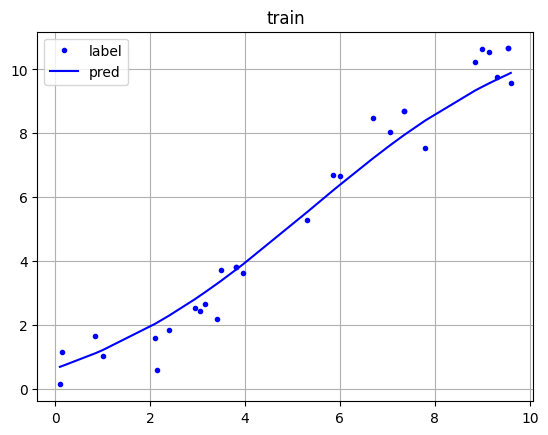

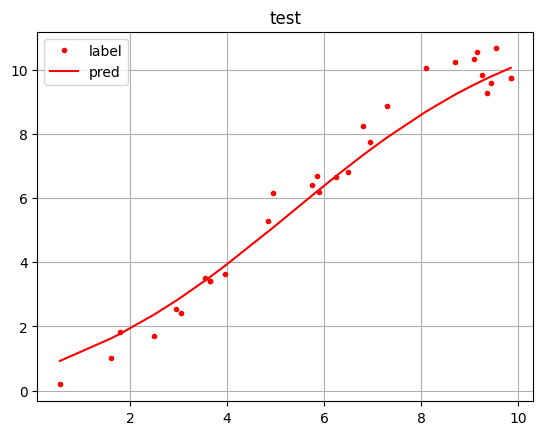

In [26]:
# 결과 시각화
plt.figure()
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, model(x_train), 'b-')
plt.title('train')
plt.legend(['label', 'pred'])
plt.grid()

plt.figure()
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, model(x_test), 'r-')
plt.title('test')
plt.legend(['label', 'pred'])
plt.grid()
plt.show()

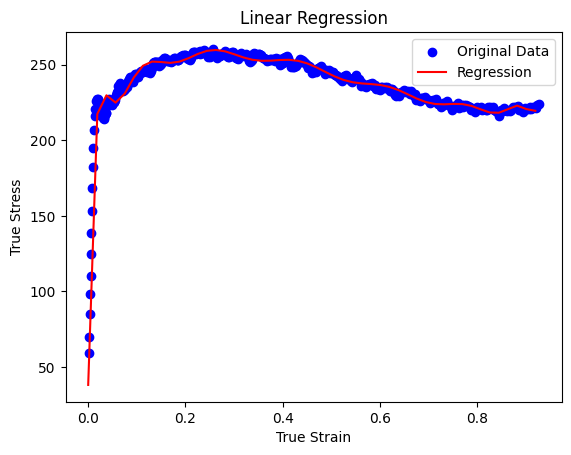

In [29]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

train_data = np.loadtxt('stress_strain_data.csv',delimiter=',')
x_data = train_data[:,0]
y_data = train_data[:,1]
x_data = np.reshape(x_data,(-1,1)) 
y_data = np.reshape(y_data,(-1,1)) 

poly_f = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly_f.fit_transform(x_data)
linear_regression_model = LinearRegression()  
linear_regression_model.fit(x_poly, y_data)

plt.scatter(x_data, y_data, color='blue' ,label='Original Data') 
x_data2 = np.linspace(0, 0.92, num = 50)
x_data2 = np.reshape(x_data2, (-1,1))
x_poly2 = poly_f.fit_transform(x_data2)

y_pred = linear_regression_model.predict(x_poly2)
plt.plot(x_data2, y_pred, color = 'red', label='Regression')
plt.title('Linear Regression')
plt.xlabel('True Strain')
plt.ylabel('True Stress')
plt.legend()


### 실습. Stress-Strain Curve Fitting
Hot compression test의 Stress-Strain 데이터를 ANN으로 Fitting 해보시오

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("stress_strain_data.csv",delimiter=',')

x_data = data[:,0]
y_data = data[:,1]
print(x_data.shape, y_data.shape)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=100,activation='tanh', input_shape=(1,), kernel_initializer="he_normal"), 
	tf.keras.layers.Dense(units=100, activation='tanh', kernel_initializer="he_normal"), 
	tf.keras.layers.Dense(units=100, activation='relu', kernel_initializer="he_normal"), 
	tf.keras.layers.Dense(units=1,kernel_initializer="he_normal") ])    

optimizer = tf.keras.optimizers.Adam(0.01)

#학습
model.compile(loss = 'mse', optimizer = optimizer, metrics=['mse'])
model.fit(x_data, y_data,epochs = 100)


(465,) (465,)
Epoch 1/100
15/15 [==============================] - 2s 5ms/step - loss: 36866.7305 - mse: 36866.7305
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 3189.7134 - mse: 3189.7134
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1029.3496 - mse: 1029.3496
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 724.9130 - mse: 724.9130
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 572.6019 - mse: 572.6019
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 523.9234 - mse: 523.9234
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 528.9897 - mse: 528.9897
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 525.9682 - mse: 525.9682
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 517.3024 - mse: 517.3024
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 490.9998 - mse: 490.99

15/15 [==============================] - 0s 3ms/step - loss: 34.7163 - mse: 34.7163
Epoch 84/100
15/15 [==============================] - 0s 3ms/step - loss: 26.4433 - mse: 26.4433
Epoch 85/100
15/15 [==============================] - 0s 3ms/step - loss: 31.3138 - mse: 31.3138
Epoch 86/100
15/15 [==============================] - 0s 3ms/step - loss: 44.6926 - mse: 44.6926
Epoch 87/100
15/15 [==============================] - 0s 3ms/step - loss: 31.0495 - mse: 31.0495
Epoch 88/100
15/15 [==============================] - 0s 3ms/step - loss: 21.6182 - mse: 21.6182
Epoch 89/100
15/15 [==============================] - 0s 3ms/step - loss: 17.1139 - mse: 17.1139
Epoch 90/100
15/15 [==============================] - 0s 3ms/step - loss: 18.7329 - mse: 18.7329
Epoch 91/100
15/15 [==============================] - 0s 3ms/step - loss: 52.1858 - mse: 52.1858
Epoch 92/100
15/15 [==============================] - 0s 3ms/step - loss: 56.8014 - mse: 56.8014
Epoch 93/100
15/15 [=======================

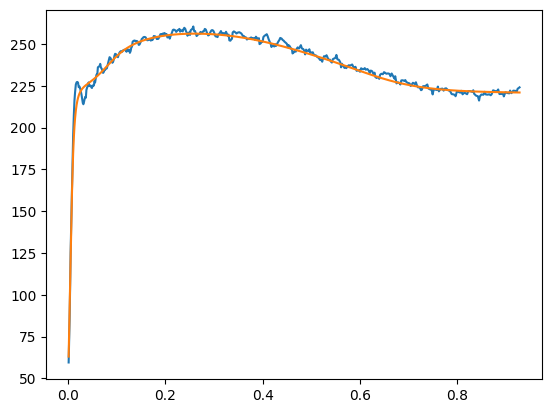

In [8]:
plt.plot(x_data, y_data)
plt.plot(x_data, model(x_data))
plt.show()
